In [4]:
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as AT
import matplotlib.pyplot as plt
import numpy as np

In [11]:
file_path = './data/train_audio/abethr1/XC128013.ogg'
data, sample_rate = torchaudio.load(file_path)
print(data.shape, sample_rate) # Ts=1/fs: 31.25 µs(micro second)
print(f'time:{data.shape[1] / sample_rate: .1f}s')

torch.Size([1, 1459513]) 32000
time: 45.6s


# Spectrogram for single file

## Parameter Setting

In [12]:
def next_power_of_two(n):
    return int(2 ** np.ceil(np.log2(n)))

win_length = int(np.ceil(sample_rate * 0.05))
nfft = next_power_of_two(win_length)
hop_length = int(np.ceil(sample_rate * 0.01))
print(f'nfft: {nfft}, win_length: {win_length}, hop_length: {hop_length}')

nfft: 2048, win_length: 1600, hop_length: 320


## Get Spectrogram

In [13]:
spectrogram = nn.Sequential(
    AT.Spectrogram(
        n_fft=nfft,
        hop_length=hop_length,
        win_length=win_length
    ),
    AT.AmplitudeToDB() # convert power spectrogram to log scale dB
)
spec = spectrogram(data)
print(spec.shape)
print(f'number of time axis: {spec.shape[2]}, number of frequency axis: {spec.shape[1]}')

torch.Size([1, 1025, 4561])
number of time axis: 4561, number of frequency axis: 1025


## Visualizing spectrogram

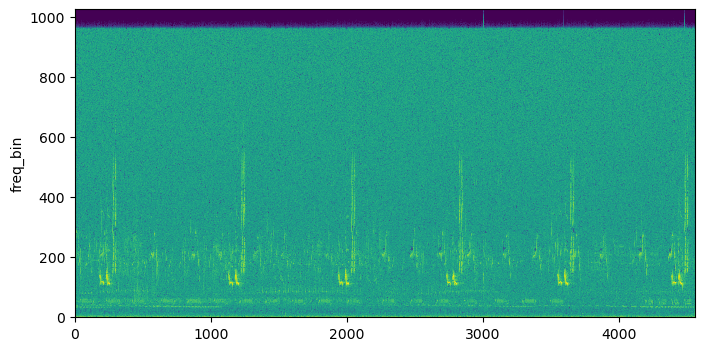

In [17]:
_, ax = plt.subplots(figsize=(8, 4))
ax.set_ylabel("freq_bin")
ax.imshow(spec[0], origin="lower", aspect="auto", interpolation="nearest")

### Min-Max normalization

tensor([[[103.3514, 141.7565, 133.6691,  ..., 201.4857, 205.8429, 195.5250],
         [ 93.5642, 143.2939, 163.4616,  ..., 204.8719, 204.9756, 191.9066],
         [101.5846, 146.5844, 173.0048,  ..., 204.6728, 202.8472, 189.3135],
         ...,
         [ 18.7473,  23.0986,  33.9556,  ...,   0.0000,  36.9836,  65.4767],
         [  5.9244,   2.7505,  34.2884,  ...,   0.0000,  36.8668,  65.4718],
         [  0.0000,   6.4993,  33.2076,  ...,   0.0000,  36.5014,  65.4633]]])


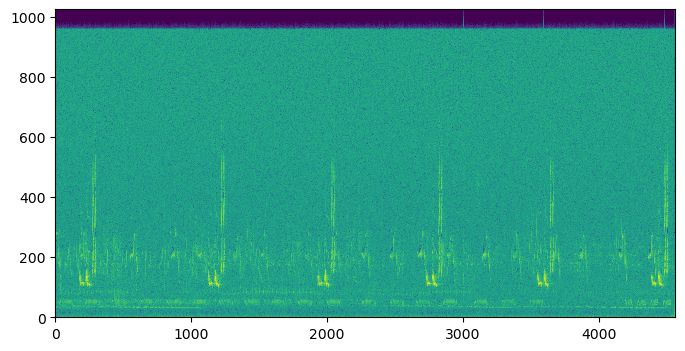

In [19]:
# spec = spec.squeeze().numpy()
spec_n = (spec - spec.min()) / (spec.max() - spec.min()) * 255
# spec = spec.type(torch.uint8)
# spec = spec.astype('uint8')
print(spec_n)

fig, ax = plt.subplots(figsize=(8, 4))
ax.pcolor(spec_n[0])
plt.show()

### -1 ~ +1 Normalization

tensor(-100.) tensor(47.3238)


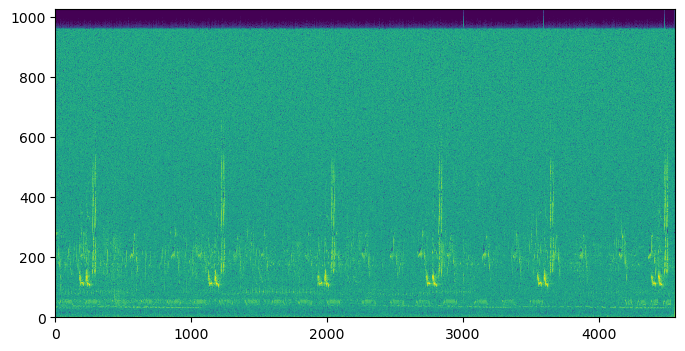

In [21]:
max_val = data.abs().max() # 데이터의 최대 진폭(음량)
audio = data / max_val
n_spec = spectrogram(audio)
print(n_spec[0].min(), n_spec[0].max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.pcolor(n_spec[0])
plt.show()